In [1]:
from IPython.display import HTML
HTML("""
<video width=1024 controls>
  <source src="car_road.mp4" type="video/mp4">
</video>
""")

In [2]:
# Import modules
import cv2
import matplotlib.pyplot as plt

video_input_file_name = "car_road.mp4"
def drawRectangle(frame, bbox):      #Display the bounding box around the selected object in each frame
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (0,255,255), 2, 1)

def displayRectangle(frame, bbox):  #Draw the bounding box around the selected object in each frame
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)

def drawText(frame, txt, location, color = (40,150,30)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)


In [3]:
tracker = cv2.TrackerGOTURN_create()  #Create 

In [4]:
# Read video
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()

width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
video_output_file_name = 'car_road-' + 'GoTURN_Output' + '.mp4'
video_out = cv2.VideoWriter(video_output_file_name,cv2.VideoWriter_fourcc(*'avc1'), 10, (width, height))


(234, 111, 111, 142)


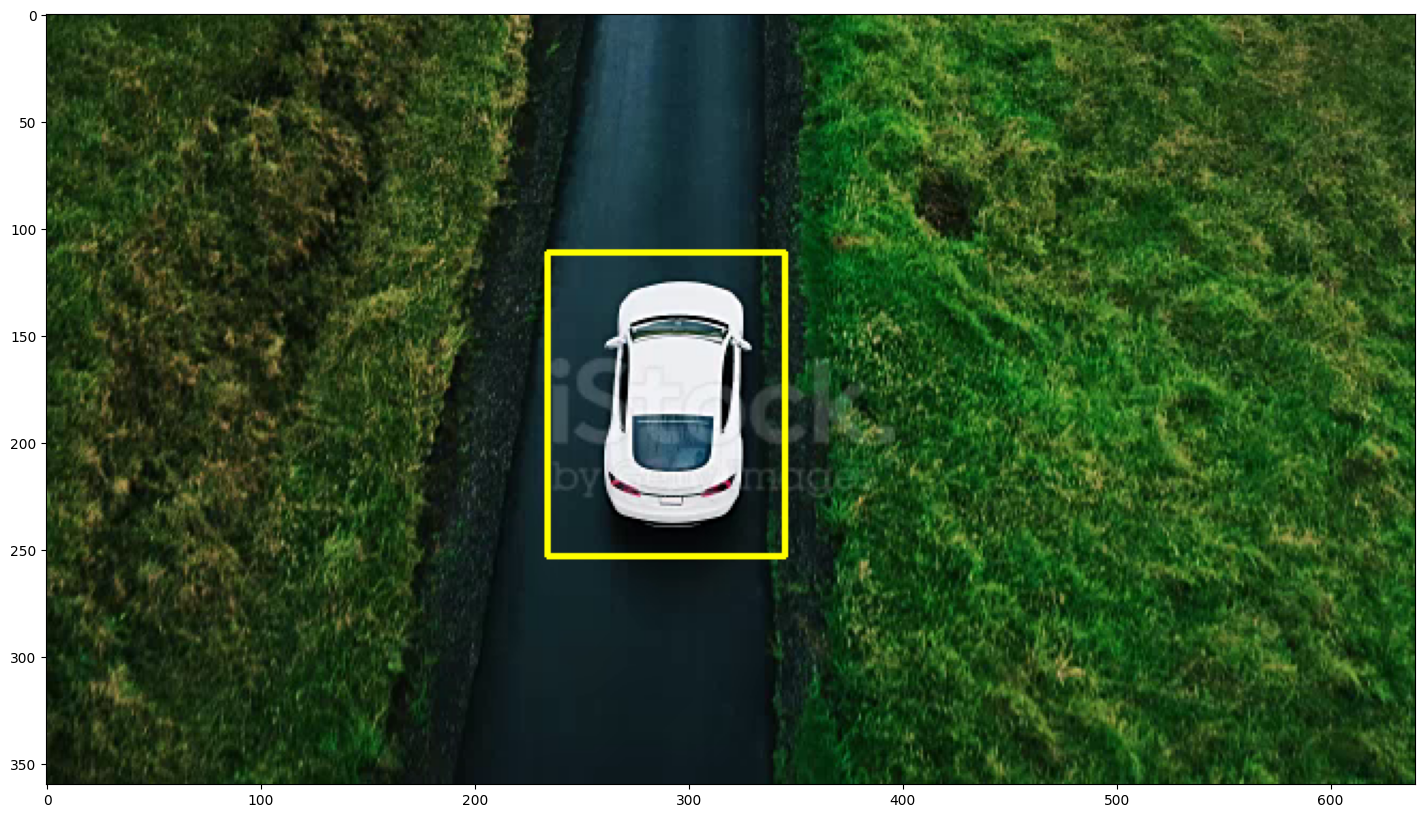

In [5]:
# Define a bounding box
bbox = cv2.selectROI(frame, False)
print(bbox)
displayRectangle(frame,bbox)

In [6]:
# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

In [7]:
while True:
    ok, frame = video.read()
    if not ok:
        break 
    
    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else :
        drawText(frame, "Unable to Track !", (80,140), (0, 255, 255))

    # Display Info
    drawText(frame, "GOTURN" + " Tracker", (50,30))
    
    # Write frame to video
    video_out.write(frame)
    
#video.release()
video_out.release()

In [8]:
HTML("""
<video width=1024 controls>
  <source src="car_road-GoTURN_Output.mp4" type="video/mp4">
</video>
""")